In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy as so
import scipy.signal as sg
from scipy.signal import correlate
%matplotlib inline
from scipy import fftpack
from scipy import signal
import math
import seaborn as sns
import pickle
import matplotlib.patches as patches

In [7]:
state=pd.read_csv('classification.csv', encoding="shift-jis")

In [8]:
state.head()

,Unnamed: 0,name,date,age,gender,grip power,OLS,5m,TUG,FR,CS-30,sum
0,0,落合信子,201806,1,1,0,0,1,1,0,1,5
1,1,落合信子,201809,1,1,0,0,1,1,0,0,4
2,2,落合信子,201812,1,1,0,0,1,1,0,1,5
3,3,落合信子,201903,1,1,0,1,1,1,0,0,5
4,4,落合信子,201906,1,1,0,0,1,1,0,0,4


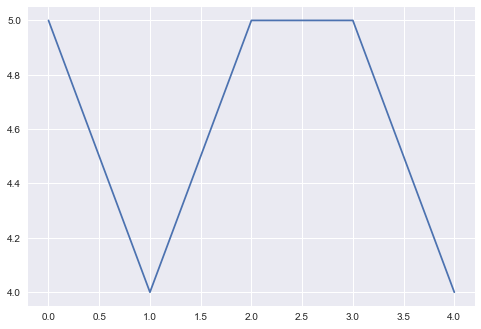

In [4]:
plt.plot(state[state["name"]=="落合信子"]["sum"])

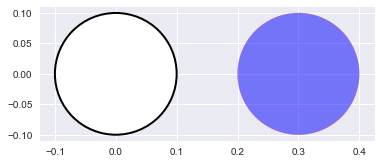

In [60]:
fig = plt.figure()
ax = plt.axes()

# fc = face color, ec = edge color
c1=patches.Circle(xy=(0, 0), radius=0.1, fc='white', ec='black', linewidth=2)
c2=patches.Circle(xy=(0.3, 0), radius=0.1, fc='b', ec='r', alpha=0.5)
ax.add_patch(c1)
ax.add_patch(c2)

plt.axis('scaled')
ax.set_aspect('equal')

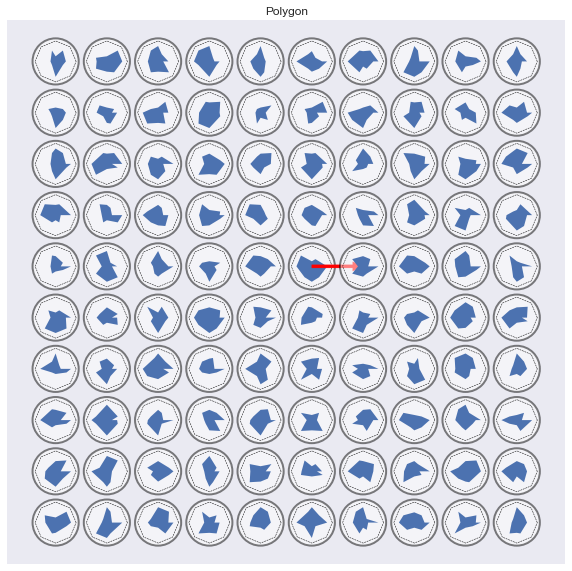

In [5]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))

patches = []

def rad():
    z=np.random.randint(1, 4)*0.1
    return z
n=8

# 円
for k in range(10):
    for h in range(10): 
        circle1 = mpatches.Circle(xy=(0.5+k, 0.5+h), radius=0.45, fc='white', ec='black', linewidth=2 ,alpha=0.5)
        patches.append(['Circle', circle1])
        
        # 多角形：能力分
        xy = np.array([[0.5+k+np.cos(2*np.pi*0/n)*rad(), 0.5+h+np.sin(2*np.pi*0/n)*rad()],
                       [0.5+k+np.cos(2*np.pi*1/n)*rad(), 0.5+h+np.sin(2*np.pi*1/n)*rad()],
                       [0.5+k+np.cos(2*np.pi*2/n)*rad(), 0.5+h+np.sin(2*np.pi*2/n)*rad()],
                       [0.5+k+np.cos(2*np.pi*3/n)*rad(), 0.5+h+np.sin(2*np.pi*3/n)*rad()],
                       [0.5+k+np.cos(2*np.pi*4/n)*rad(), 0.5+h+np.sin(2*np.pi*4/n)*rad()],                       
                       [0.5+k+np.cos(2*np.pi*5/n)*rad(), 0.5+h+np.sin(2*np.pi*5/n)*rad()],
                       [0.5+k+np.cos(2*np.pi*6/n)*rad(), 0.5+h+np.sin(2*np.pi*6/n)*rad()], 
                       [0.5+k+np.cos(2*np.pi*7/n)*rad(), 0.5+h+np.sin(2*np.pi*7/n)*rad()],                        
                       [0.5+k+np.cos(2*np.pi*8/n)*rad(), 0.5+h+np.sin(2*np.pi*8/n)*rad()]])
        polygon = mpatches.Polygon(xy=xy, closed=True)
        patches.append(['Polygon', polygon])
        
        
        # 多角形：能力の枠だけ
        xy = np.array([[0.5+k+np.cos(2*np.pi*0/n)*0.4, 0.5+h+np.sin(2*np.pi*0/n)*0.4],
                       [0.5+k+np.cos(2*np.pi*1/n)*0.4, 0.5+h+np.sin(2*np.pi*1/n)*0.4],
                       [0.5+k+np.cos(2*np.pi*2/n)*0.4, 0.5+h+np.sin(2*np.pi*2/n)*0.4],
                       [0.5+k+np.cos(2*np.pi*3/n)*0.4, 0.5+h+np.sin(2*np.pi*3/n)*0.4],
                       [0.5+k+np.cos(2*np.pi*4/n)*0.4, 0.5+h+np.sin(2*np.pi*4/n)*0.4],                       
                       [0.5+k+np.cos(2*np.pi*5/n)*0.4, 0.5+h+np.sin(2*np.pi*5/n)*0.4],
                       [0.5+k+np.cos(2*np.pi*6/n)*0.4, 0.5+h+np.sin(2*np.pi*6/n)*0.4], 
                       [0.5+k+np.cos(2*np.pi*7/n)*0.4, 0.5+h+np.sin(2*np.pi*7/n)*0.4],                        
                       [0.5+k+np.cos(2*np.pi*8/n)*0.4, 0.5+h+np.sin(2*np.pi*8/n)*0.4]])
        polygon = mpatches.Polygon(xy=xy, closed=True,linestyle='--',fill=False, color='black', linewidth=0.5)
        patches.append(['Polygon', polygon])        
        
        
        if(k==5 and h==5):
            arrow1 = mpatches.Arrow(x=0.5+k, y=0.5+h, dx=1, dy=0, width=0.3, color="red")
            patches.append(['Arrow', arrow1])

            
def make_ticks_off(ax):
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

for i, (name, patch) in enumerate(patches, 1):
    #ax = fig.add_subplot(5, 4, i)
    ax = plt.axes()
    ax.add_patch(patch)
    ax.set_title(name)
    make_ticks_off(ax)

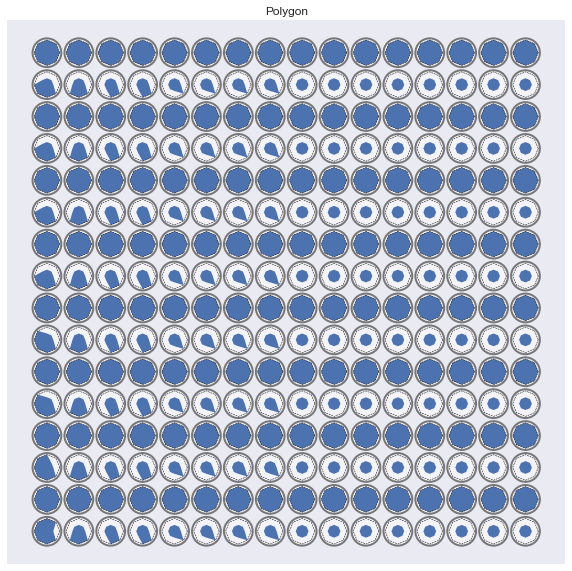

In [9]:
#全ての状態量を描画する
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))

patches = []

def all_state(d):
    #age
    age=0.2 if (d>=0 and d%2==0) else 0.4
    #gender
    gender=0.2 if (d>=2 and d%2==0) else 0.4
    #grip
    grip=0.2 if (d>=4 and d%2==0) else 0.4
    #ols
    ols=0.2 if (d>=8 and d%2==0) else 0.4   
    #t_5m
    t_5m=0.2 if (d>=16 and d%2==0) else 0.4   
    #tug
    tug=0.2 if (d>=32 and d%2==0) else 0.4   
    #fr
    fr=0.2 if (d>=64 and d%2==0) else 0.4
    #cs30
    cs30=0.2 if (d>=128 and d%2==0) else 0.4      
    return [age,gender,grip,ols,t_5m,tug,fr,cs30]
    d=d+1
    print(bin(d))

d=0
n=8
for p in range(16):
    for q in range(16):
        circle1 = mpatches.Circle(xy=(0.5+p, 0.5+q), radius=0.45, fc='white', ec='black', linewidth=2 ,alpha=0.5)
        patches.append(['Circle', circle1])

        # 多角形：能力分の表示
        al_st=all_state(d)
        xy = np.array([[0.5+p+np.cos(2*np.pi*0/n)*al_st[0], 0.5+q+np.sin(2*np.pi*0/n)*al_st[0]],
                       [0.5+p+np.cos(2*np.pi*1/n)*al_st[1], 0.5+q+np.sin(2*np.pi*1/n)*al_st[1]],
                       [0.5+p+np.cos(2*np.pi*2/n)*al_st[2], 0.5+q+np.sin(2*np.pi*2/n)*al_st[2]],
                       [0.5+p+np.cos(2*np.pi*3/n)*al_st[3], 0.5+q+np.sin(2*np.pi*3/n)*al_st[3]],
                       [0.5+p+np.cos(2*np.pi*4/n)*al_st[4], 0.5+q+np.sin(2*np.pi*4/n)*al_st[4]],                       
                       [0.5+p+np.cos(2*np.pi*5/n)*al_st[5], 0.5+q+np.sin(2*np.pi*5/n)*al_st[5]],
                       [0.5+p+np.cos(2*np.pi*6/n)*al_st[6], 0.5+q+np.sin(2*np.pi*6/n)*al_st[6]], 
                       [0.5+p+np.cos(2*np.pi*7/n)*al_st[7], 0.5+q+np.sin(2*np.pi*7/n)*al_st[7]],                        
                       [0.5+p+np.cos(2*np.pi*8/n)*al_st[0], 0.5+q+np.sin(2*np.pi*8/n)*al_st[0]]])
        polygon = mpatches.Polygon(xy=xy, closed=True)
        patches.append(['Polygon', polygon])   
        
        # 多角形：能力の枠
        xy = np.array([[0.5+p+np.cos(2*np.pi*0/n)*0.4, 0.5+q+np.sin(2*np.pi*0/n)*0.4],
                       [0.5+p+np.cos(2*np.pi*1/n)*0.4, 0.5+q+np.sin(2*np.pi*1/n)*0.4],
                       [0.5+p+np.cos(2*np.pi*2/n)*0.4, 0.5+q+np.sin(2*np.pi*2/n)*0.4],
                       [0.5+p+np.cos(2*np.pi*3/n)*0.4, 0.5+q+np.sin(2*np.pi*3/n)*0.4],
                       [0.5+p+np.cos(2*np.pi*4/n)*0.4, 0.5+q+np.sin(2*np.pi*4/n)*0.4],                       
                       [0.5+p+np.cos(2*np.pi*5/n)*0.4, 0.5+q+np.sin(2*np.pi*5/n)*0.4],
                       [0.5+p+np.cos(2*np.pi*6/n)*0.4, 0.5+q+np.sin(2*np.pi*6/n)*0.4], 
                       [0.5+p+np.cos(2*np.pi*7/n)*0.4, 0.5+q+np.sin(2*np.pi*7/n)*0.4],                        
                       [0.5+p+np.cos(2*np.pi*8/n)*0.4, 0.5+q+np.sin(2*np.pi*8/n)*0.4]])
        polygon = mpatches.Polygon(xy=xy, closed=True,linestyle='--',fill=False, color='black', linewidth=0.5)
        patches.append(['Polygon', polygon])
        d=d+1
        
def make_ticks_off(ax):
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

for i, (name, patch) in enumerate(patches, 1):
    #ax = fig.add_subplot(5, 4, i)
    ax = plt.axes()
    ax.add_patch(patch)
    ax.set_title(name)
    make_ticks_off(ax)

RuntimeError: Can not put single artist in more than one figure

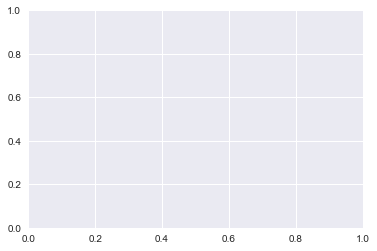

In [10]:

def rad():
    z=np.random.randint(1, 4)*0.1
    return z
n=8

# 円
for k in range(10):
    for h in range(10): 
        circle1 = mpatches.Circle(xy=(0.5+k, 0.5+h), radius=0.45, fc='white', ec='black', linewidth=2 ,alpha=0.5)
        patches.append(['Circle', circle1])
        
        # 多角形：能力分
        xy = np.array([[0.5+k+np.cos(2*np.pi*0/n)*rad(), 0.5+h+np.sin(2*np.pi*0/n)*rad()],
                       [0.5+k+np.cos(2*np.pi*1/n)*rad(), 0.5+h+np.sin(2*np.pi*1/n)*rad()],
                       [0.5+k+np.cos(2*np.pi*2/n)*rad(), 0.5+h+np.sin(2*np.pi*2/n)*rad()],
                       [0.5+k+np.cos(2*np.pi*3/n)*rad(), 0.5+h+np.sin(2*np.pi*3/n)*rad()],
                       [0.5+k+np.cos(2*np.pi*4/n)*rad(), 0.5+h+np.sin(2*np.pi*4/n)*rad()],                       
                       [0.5+k+np.cos(2*np.pi*5/n)*rad(), 0.5+h+np.sin(2*np.pi*5/n)*rad()],
                       [0.5+k+np.cos(2*np.pi*6/n)*rad(), 0.5+h+np.sin(2*np.pi*6/n)*rad()], 
                       [0.5+k+np.cos(2*np.pi*7/n)*rad(), 0.5+h+np.sin(2*np.pi*7/n)*rad()],                        
                       [0.5+k+np.cos(2*np.pi*8/n)*rad(), 0.5+h+np.sin(2*np.pi*8/n)*rad()]])
        polygon = mpatches.Polygon(xy=xy, closed=True)
        patches.append(['Polygon', polygon])
        
        
        # 多角形：能力の枠だけ
        xy = np.array([[0.5+k+np.cos(2*np.pi*0/n)*0.4, 0.5+h+np.sin(2*np.pi*0/n)*0.4],
                       [0.5+k+np.cos(2*np.pi*1/n)*0.4, 0.5+h+np.sin(2*np.pi*1/n)*0.4],
                       [0.5+k+np.cos(2*np.pi*2/n)*0.4, 0.5+h+np.sin(2*np.pi*2/n)*0.4],
                       [0.5+k+np.cos(2*np.pi*3/n)*0.4, 0.5+h+np.sin(2*np.pi*3/n)*0.4],
                       [0.5+k+np.cos(2*np.pi*4/n)*0.4, 0.5+h+np.sin(2*np.pi*4/n)*0.4],                       
                       [0.5+k+np.cos(2*np.pi*5/n)*0.4, 0.5+h+np.sin(2*np.pi*5/n)*0.4],
                       [0.5+k+np.cos(2*np.pi*6/n)*0.4, 0.5+h+np.sin(2*np.pi*6/n)*0.4], 
                       [0.5+k+np.cos(2*np.pi*7/n)*0.4, 0.5+h+np.sin(2*np.pi*7/n)*0.4],                        
                       [0.5+k+np.cos(2*np.pi*8/n)*0.4, 0.5+h+np.sin(2*np.pi*8/n)*0.4]])
        polygon = mpatches.Polygon(xy=xy, closed=True,linestyle='--',fill=False, color='black', linewidth=0.5)
        patches.append(['Polygon', polygon])        
        
        
        if(k==5 and h==5):
            arrow1 = mpatches.Arrow(x=0.5+k, y=0.5+h, dx=1, dy=0, width=0.3, color="red")
            patches.append(['Arrow', arrow1])

            
def make_ticks_off(ax):
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

for i, (name, patch) in enumerate(patches, 1):
    #ax = fig.add_subplot(5, 4, i)
    ax = plt.axes()
    ax.add_patch(patch)
    ax.set_title(name)
    make_ticks_off(ax)

In [13]:
def test_list():
    return ['abc', 100]

result = test_list()


In [36]:
bin(0b1+0b1+0b1+0b1)

'0b100'

In [40]:
bin(0b00000000+0b1)

'0b1'

In [47]:
d=3
age=0 if (d%2==0) else 1
print(age)

1


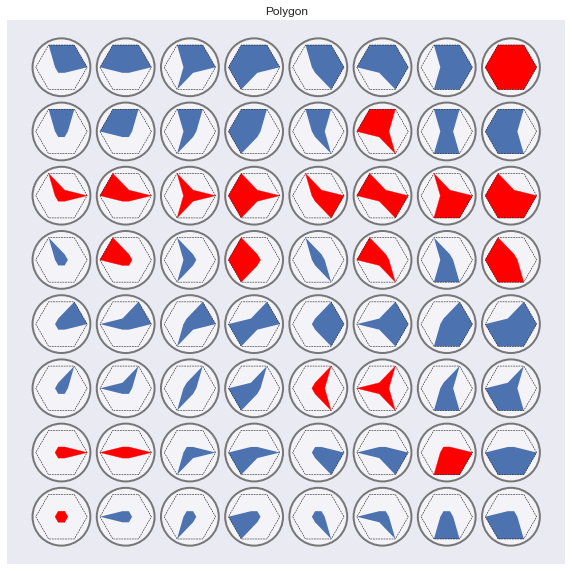

In [48]:
#全ての状態量を描画する
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))

patches = []

nm='落合信子'

def all_state(d):
    ols=float(bin(d)[-1]) if (len(bin(d))-2>=1) else 0.
    fr=float(bin(d)[-2]) if (len(bin(d))-2>=2) else 0.0
    t_5m=float(bin(d)[-3]) if (len(bin(d))-2>=3) else 0.0
    tug=float(bin(d)[-4]) if (len(bin(d))-2>=4) else 0.0
    cs30=float(bin(d)[-5]) if (len(bin(d))-2>=5) else 0.0 
    grip=float(bin(d)[-6]) if (len(bin(d))-2>=6) else 0.0
    sub=0
    for nm in range(len(state['name'].unique())):
        subname=state['name'].unique()[nm]
        for l in range(len(state[state['name']==subname])):
            if (grip==float(state[state['name']==subname]['grip power'][l:l+1]) and
                ols ==float(state[state['name']==subname]['OLS'][l:l+1]) and
                t_5m==float(state[state['name']==subname]['5m'][l:l+1]) and
                tug ==float(state[state['name']==subname]['TUG'][l:l+1]) and
                fr  ==float(state[state['name']==subname]['FR'][l:l+1]) and 
                cs30==float(state[state['name']==subname]['CS-30'][l:l+1])
               ):
                sub=1
    grip=grip*0.4 if (grip==1) else 0.1
    ols=ols*0.4  if (ols ==1) else 0.1
    t_5m=t_5m*0.4  if (t_5m==1)  else 0.1
    tug=tug*0.4 if (tug ==1) else 0.1   
    fr=fr*0.4 if (fr ==1) else 0.1
    cs30=cs30*0.4 if (cs30==1) else 0.1
    #return [grip,ols,t_5m,tug,fr,cs30,sub]
    return [ols,fr,t_5m,tug,cs30,grip,sub]
    

d=0
n=6
sub=0
for p in range(8):
    for q in range(8):
        circle1 = mpatches.Circle(xy=(0.5+p, 0.5+q), radius=0.45, fc='white', ec='black', linewidth=2 ,alpha=0.5)
        patches.append(['Circle', circle1])

        # 多角形：能力分の表示
        al_st=all_state(d)
        #print(al_st)
        xy = np.array([[0.5+p+np.cos(2*np.pi*0/n)*al_st[0], 0.5+q+np.sin(2*np.pi*0/n)*al_st[0]],
                       [0.5+p+np.cos(2*np.pi*1/n)*al_st[1], 0.5+q+np.sin(2*np.pi*1/n)*al_st[1]],
                       [0.5+p+np.cos(2*np.pi*2/n)*al_st[2], 0.5+q+np.sin(2*np.pi*2/n)*al_st[2]],
                       [0.5+p+np.cos(2*np.pi*3/n)*al_st[3], 0.5+q+np.sin(2*np.pi*3/n)*al_st[3]],
                       [0.5+p+np.cos(2*np.pi*4/n)*al_st[4], 0.5+q+np.sin(2*np.pi*4/n)*al_st[4]],                       
                       [0.5+p+np.cos(2*np.pi*5/n)*al_st[5], 0.5+q+np.sin(2*np.pi*5/n)*al_st[5]] ])
        if (al_st[6]==1):
            polygon = mpatches.Polygon(xy=xy, closed=True, color='red')
        else: 
            polygon = mpatches.Polygon(xy=xy, closed=True)
        patches.append(['Polygon', polygon])   
        
        # 多角形：能力の枠
        xy = np.array([[0.5+p+np.cos(2*np.pi*0/n)*0.4, 0.5+q+np.sin(2*np.pi*0/n)*0.4],
                       [0.5+p+np.cos(2*np.pi*1/n)*0.4, 0.5+q+np.sin(2*np.pi*1/n)*0.4],
                       [0.5+p+np.cos(2*np.pi*2/n)*0.4, 0.5+q+np.sin(2*np.pi*2/n)*0.4],
                       [0.5+p+np.cos(2*np.pi*3/n)*0.4, 0.5+q+np.sin(2*np.pi*3/n)*0.4],
                       [0.5+p+np.cos(2*np.pi*4/n)*0.4, 0.5+q+np.sin(2*np.pi*4/n)*0.4],                       
                       [0.5+p+np.cos(2*np.pi*5/n)*0.4, 0.5+q+np.sin(2*np.pi*5/n)*0.4],
                       [0.5+p+np.cos(2*np.pi*6/n)*0.4, 0.5+q+np.sin(2*np.pi*6/n)*0.4] ])
        polygon = mpatches.Polygon(xy=xy, closed=True,linestyle='--',fill=False, color='black', linewidth=0.5)
        patches.append(['Polygon', polygon])
        d=d+1
        
def make_ticks_off(ax):
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

for i, (name, patch) in enumerate(patches, 1):
    #ax = fig.add_subplot(5, 4, i)
    ax = plt.axes()
    ax.add_patch(patch)
    ax.set_title(name)
    make_ticks_off(ax)

In [43]:
sub=0
for nm in range(len(state['name'].unique())):
    print(state['name'].unique()[nm])
    for l in range(len(state[state['name']==nm])):
        if (grip==float(state[state['name']==nm]['grip power'][l:l+1]) and
            ols ==float(state[state['name']==nm]['OLS'][l:l+1]) and
            t_5m==float(state[state['name']==nm]['5m'][l:l+1]) and
            tug ==float(state[state['name']==nm]['TUG'][l:l+1]) and
            fr  ==float(state[state['name']==nm]['FR'][l:l+1]) and 
            cs30==float(state[state['name']==nm]['CS-30'][l:l+1])
            ):
            sub=1
            print(sub)

落合信子
田所利子
鈴木敏子
関利江
渡邊賢一
岡村はぎの
高津久代
五十嵐治美
今野巌
舛岡良子
石橋初子
大久保イツ
大竹真理子
根本公子
森幸
志村時枝
及川吉夫
深見喜久郎
矢口かつ子
今野幸雄
服部吉枝
田中初美
清水政子
大岩昌子
佐藤弘
山口くに子
井上登志子
星野紀子
山崎千代子
佐藤妙子
中嶋洋次
鰐川政子
井上泰子
竹本正恵
藤城ヒサ子
渡辺喜久子
飯島照子
天野ツル
高野伴子
池田幸枝
池田和雄
長嶋若子
小田まゆみ
波形キミ
廣井由利子
佐久間照子
